# Ten Coin Flips*

## Motivating Example
Professor Vidakovic gives a simple motivating example: say you flip a coin ten times and it comes up tails each time.

A frequentist statistician might estimate the probability of heads as:

$$\hat{p} = \frac{x}{n} = \frac{0}{10} = 0$$

where $x$ is the number of successes. Or they might try to maximize the binomial likelihood:

$$\hat{p} = arg \max_p \left[ {n \choose{x}} p^{x}(1 - p)^{n - x} \right] = arg \max_p \left[(1 - p)^{10}\right] = 0$$

With a Bayesian approach, we can incorporate a prior probability. Say we have no reason to believe that this is a trick coin. We might say we think $p$ has an equal probability of being anything from 0 to 1: a continuous uniform prior. 

$$\pi(p \mid x) = \frac{L(x \mid p) \pi(p)}{\int_p L(x \mid p) \pi(p) dp} = \frac{(1 - p)^{10} \cdot \mathbf{1}(0 \le p \le 1)}{\int_0^1 (1 - p)^{10} dp} = 11(1-p)^{10} \mathbf{1}(0 \le p \le 1)$$

Here, $L(x \mid p)$ is the likelihood function with known $x$ and unknown $p$, and $\mathbf{1}(0 \le p \le 1)$ is an indicator function, meaning it is equal to 1 if the given condition is true and 0 otherwise.

The mean of a univariate continuous random variable is

$$E[X] =  \int_{p} xf(x)dx$$

In this case we're looking at:

$$ \int_{0}^{1} p\cdot 11(1-p)^{10} dp = \frac{1}{12}$$

We'll discuss Bayes' theorem more in Units 3 and 4. For now, just understand that the professor is saying that by adding this prior to our model, we get a much more reasonable probability: a $1/12$ chance of heads on the next flip.

## Demo

The professor provides some Python code related to the above calculations, along with some simple plots. I'm going to clean up some of this code and use this as an excuse to introduce some SciPy features and other stuff.

I like to use [Black](https://black.readthedocs.io/en/stable/) to automatically format my Python code for readability. In Jupyter Lab, you can use the extension [nb_black](https://github.com/dnanhkhoa/nb_black) to handle it.

In [1]:
%load_ext lab_black

First, he plots our posterior. Generally to plot a probability density function (PDF), you create a range of values as input, then plot that versus the output of your PDF.

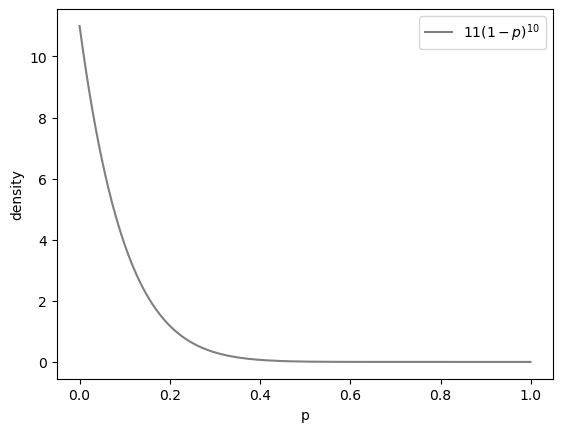

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def posterior(p):
    return 11 * (1 - p) ** 10


p = np.arange(0, 1, 0.001)

plt.plot(p, posterior(p), color="grey", label="$11(1-p)^{10}$")
plt.legend()
plt.xlabel("p")
plt.ylabel("density")
plt.show()

Next, he checks that this density integrates to 1 using numerical integration:

In [3]:
from scipy.integrate import quad

quad(posterior, 0, 1)

(1.0000000000000002, 1.1102230246251569e-14)

The [```scipy.integrate.quad```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) function returns the value of the definite integral along with the absolute error.

Find the mean:

In [4]:
mean = quad(lambda p: p * posterior(p), 0, 1)[0]
print(mean)

0.08333333333333336


Find the median, which will be:

$$\int_0^m 11(1-p)^{10} dp = .5$$

We can use [```scipy.optimization.fsolve```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) to solve for the median $m$.

In [5]:
from scipy.optimize import fsolve


def median_func(m):
    return quad(posterior, 0, m)[0] - 0.5


median = fsolve(median_func, 0.1)[0]
print(median)

0.06106908933829364


The mode or maximum a posteriori probability (MAP) is equal to:

$$arg \max_p \left[ 11(1-p)^{10} \mathbf{1}(0 \le p \le 1) \right]$$

which we already know is 0. But if we wanted to calculate it we could use [```scipy.optimize.minimize```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize). 

In [6]:
from scipy.optimize import minimize

bounds = [(0, 1)]

minimize_dict = minimize(
    lambda p: -posterior(p), x0=0, method="L-BFGS-B", bounds=bounds
)

print(minimize_dict)

mode = minimize_dict["x"][0]

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -11.0
        x: [ 0.000e+00]
      nit: 0
      jac: [ 1.100e+02]
     nfev: 2
     njev: 1
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>


The mode is x in the above output.

Finally, we can plot our PDF with the mean, median, and mode.

In [7]:
def add_dots(x, y, label):
    annotation = f"{x:.3f}"

    plt.scatter(x, y, label=label, linewidth=1, alpha=1.0, zorder=2)
    plt.annotate(
        annotation,
        xy=(x, y),
        xytext=(x + 0.05, y + 0.05),
        fontsize=10,
    )

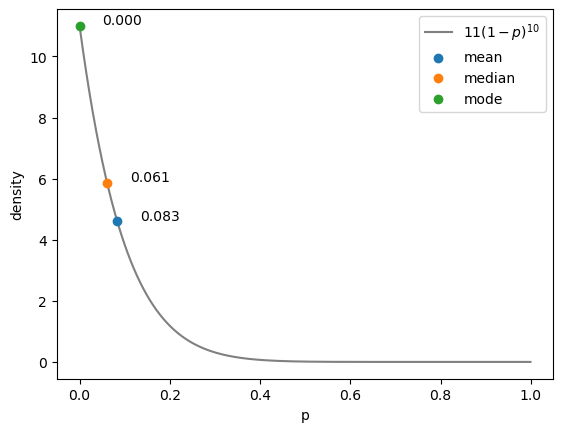

In [8]:
plt.plot(p, posterior(p), color="grey", label="$11(1-p)^{10}$")

add_dots(mean, posterior(mean), "mean")
add_dots(median, posterior(median), "median")
add_dots(mode, posterior(mode), "mode")

plt.legend()

plt.xlabel("p")
plt.ylabel("density")
plt.show()

In [9]:
%load_ext watermark
%watermark -n -u -v -iv

Last updated: Mon May 15 2023

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.9.0

numpy     : 1.24.2
matplotlib: 3.6.3

